In [9]:
%load_ext autoreload
%autoreload 2

from PSO import *
from pykitti.tracking import KittiTrackingLabels
from Movie import images_to_video, create_movie
import time
import sys
sys.path.insert(0, './datasets')
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training"
seq = "0000"

kitti = PyKitti2(basedir, seq, with_labels="mask")
length = len(kitti)
frames = []

# variables for standard deviation
NMIList = np.array([])
RTDeltaList = []
FrobList = np.array([])
QuatList = np.array([])

start = time.time()
for i in range(10):
    # Create Particle Swarm object
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = kitti[i]
    RT = kitti.calib.T_cam2_velo
    P = kitti.calib.P_rect_20
    # angles: yaw, pitch, roll
    pso = PSO(15, point_cloud, cam2, P, 15, 3, 15, .5, RT_gt=RT, max_z=200, modified=True, filter=True, method="euclidean")

    startInner = time.time()
    frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=True, max_converge_count=50)
    endInner = time.time()
    NMIList = np.append(NMIList, NMI)
    RTDeltaList.append(RT_delta)
    FrobList = np.append(FrobList, frob)
    QuatList = np.append(QuatList, quat)
    
    frames.append(frame)
    print("Done Frame " + str(i+1) + " of " + str(length+1))
    print("eta frame " + str(i+1) + ": " + str(endInner - startInner))
    print()
    
RTDeltaList = np.asarray(RTDeltaList)

end = time.time()
#frames = np.asarray(frames)
#images_to_video(frames, video_name="PSO_test.mp4")
#print("Render Done")
#print("eta: " + str(end - start) + " s")

# Standardabweichungen
pso = PSO(15, point_cloud, cam2, P, 15, 3, 15, .5, RT_gt=RT, max_z=200, modified=True, filter=True, method="euclidean")
pso.std(NMIList, RTDeltaList, FrobList, QuatList)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154

Done Frame 1 of 155
eta frame 1: 61.177029848098755


Done Frame 2 of 155
eta frame 2: 24.706077575683594


Done Frame 3 of 155
eta frame 3: 51.52905488014221


Done Frame 4 of 155
eta frame 4: 58.64474439620972


Done Frame 5 of 155
eta frame 5: 28.877461433410645


Done Frame 6 of 155
eta frame 6: 60.113484621047974


Done Frame 7 of 155
eta frame 7: 65.78507828712463


Done Frame 8 of 155
eta frame 8: 69.5838189125061


Done Frame 9 of 155
eta frame 9: 38.96585416793823


Done Frame 10 of 155
eta frame 10: 55.84670972824097

Render Done
eta: 518.1563830375671 s


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154


C:\Users\bernh\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 normals
Gauss filter: 			 False
Max. Iterations: 		 1
max_translation: 		 0.06 [m]
max_roll: 			 5 [deg]
max_pitch: 			 5 [deg]
max_yaw: 			 5 [deg]
modified NMI calculation: 	 False
Best NMI for iteration  2  with  12  particles:  0.19306677  conv_count: 1     eta: 0.37s
DONE in  0.7692583000000042 s

NMI:  0.19306676889287644
Delta x:  0.057305884284529526
Delta y:  0.0016644500832713044
Delta z:  0.04106592663609379
Magnitude: 0.07052052962217902

Delta roll:  0.05811787991267181
Delta pitch:  -4.2146485556585
Delta yaw:  1.521144266016634
Frobeniusnorm: 0.1105522290222117
Quaternion Differenz: 4.48007870474845



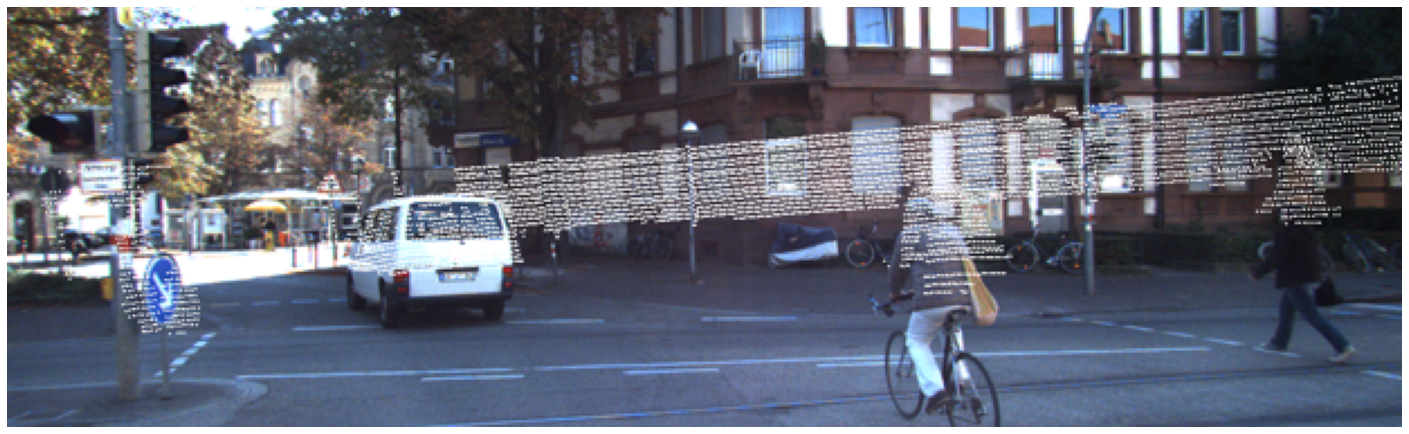

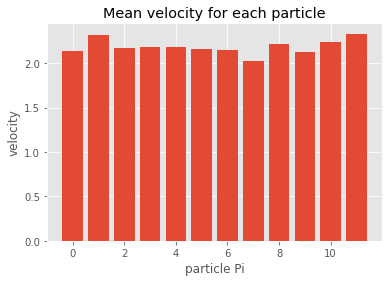

(2, 6)


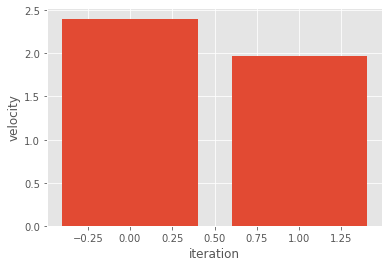

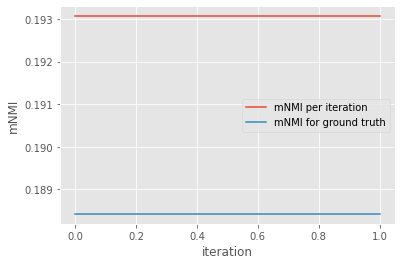

In [3]:
# Standart KITTI experiment
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, './datasets')
from PSO import *
from PyKitti2Dataset import PyKitti2

basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training"
seq = "0000"

kitti = PyKitti2(basedir, seq, with_labels="mask")

point_cloud, cam2, image3, oxts, im_labels, velo_labels = kitti[0]
RT = kitti.calib.T_cam2_velo
P = kitti.calib.P_rect_20

# Create Particle Swarm object
# angles: yaw, pitch, roll
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=30, modified=False, method="normals", filter=False)
#pso = PSO(12, point_cloud, cam2, P, 2, 2, 2, .06, RT_gt=RT, max_z=30, modified=True, method="reflectance", filter=True)


pso.c1 = .1 #.1
pso.c2 = .1 #.1
pso.w = .8

# Run Particle Swarm Optimization
frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=1, render=True, log_iterations=True, max_converge_count=50)

Plotting Yaw, Roll ...


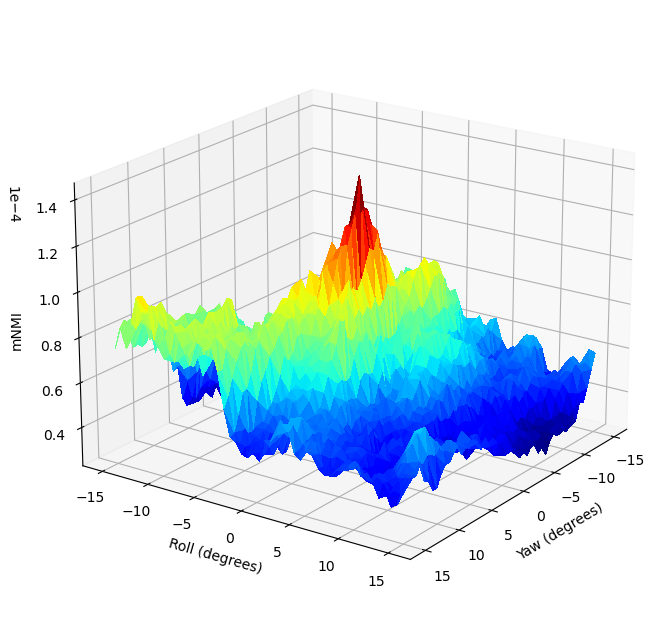

In [84]:
# Plot nmi for different roll and yaw angles
pso.plotYawRoll(max_yaw=15, max_roll=15, num_values=50)

Plotting Yaw, Roll ...


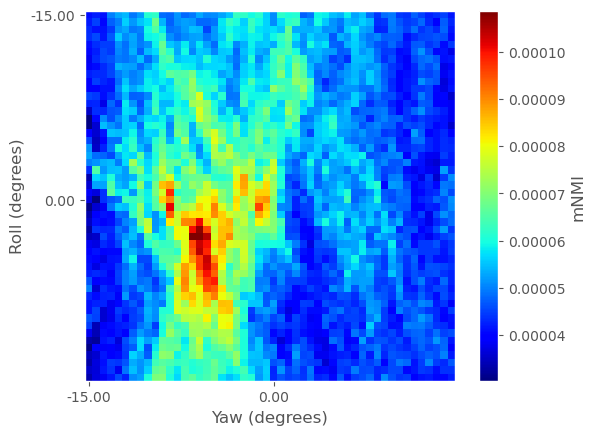

In [74]:
# Plot nmi for different roll and yaw angles
pso.plotYawRoll2D(max_yaw=15, max_roll=15, num_values=50)

In [ ]:
##################
# MULTISENSEDATA #
##################
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData

#basedir = "D:\\Thesis\\multisense"
basedir = "D:\\Thesis\\multisense_stereo"

multisense = MultiSenseData(basedir)
#RT = np.load("calib/multisense_seq_27_RT_old_to_new_recentered_GT.npy")
RT = np.load("calib/multisense_seq_stereo_TR_icp_dist_to_new_improved_GT.npy")
P = multisense.calib.P_rect_20

BATCH_SIZE = 5

point_clouds = []
cam2s = []
for i in range(BATCH_SIZE):
    point_cloud, cam2, image3, _ = multisense[i]
    point_clouds.append(point_cloud)
    cam2s.append(cam2)

# Create Particle Swarm object
# angles: roll, pitch, yaw
#pso = PSO(20, point_cloud, cam2, P, 15, 3, 15, .5, RT_gt=RT, max_z=200)
#pso = PSO(12, point_cloud, cam2, P, 2, 2, 2, .01, RT_gt=RT, max_z=1000)
pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 1e-8, RT_gt=RT, max_z=200, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

# Run Particle Swarm Optimization
def doPSO():
    frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, max_converge_count=50)

#%prun doPSO()

doPSO()

In [1]:
print("#############################################################################")
print("# KITTI: 5x euclidean, 5x reflectance on single frame for three distances t #")
print("#############################################################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("REFLECTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)
    
print()
print()

print("EUCLIDEAN DISTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k]
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=15, modified=True, method="euclidean", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
    
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)


#############################################################################
# KITTI: 5x euclidean, 5x reflectance on single frame for three distances t #
#############################################################################
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
files 154
REFLECTANCE






t =  0.01
--- Standardabweichungen ---
Std NMI: 1.1562125249052374e-06
Std dx: 0.11523373467426072
Std dy: 0.2276335484594126
Std dz: 0.12913747165879022
Std roll: 0.016723336895279824
Std pitch: 0.4115768781812223
Std yaw: 0.8421509946698474
Std Frobenius: 0.010006780834552332
Std Quaternion: 0.4054311806680368

--- Mittelwerte ---
Mean NMI: 7.262799876091204e-05
Mean dx: 0.08179918198339395
Mean dy: 0.15922510065447565
Mean dz: 0.10743120878555153
Mean roll: 0.0024235204511882102
Mean pitch: -0.2310900323927693
Mean yaw: -0.011031196426975498
Mean Frobenius: 0.

In [2]:
print("######################################################################################")
print("# MULTISENSE_SEQ: 5x euclidean, 5x reflectance on single frame for three distances t #")
print("######################################################################################")
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2

basedir = "D:\\Thesis\\multisense" # seq

dataset = MultiSenseData(basedir) # multisense


point_cloud, cam2, image3, _ = dataset[0]
RT = np.load("calib/multisense_seq_27_RT_old_to_new_recentered_GT.npy") # seq

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("REFLECTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k] # multisense
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="reflectance", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)
    
print()
print()

print("EUCLIDEAN DISTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k]
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="euclidean", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
    
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)


######################################################################################
# MULTISENSE_SEQ: 5x euclidean, 5x reflectance on single frame for three distances t #
######################################################################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
REFLECTANCE






t =  0.01
--- Standardabweichungen ---
Std NMI: 2.02279616496032e-06
Std dx: 0.06547805755407006
Std dy: 0.0768285712483743
Std dz: 0.02853160873981157
Std roll: 0.6816214739600722
Std pitch: 1.5200820521380745
Std yaw: 0.1466443214826749
Std Frobenius: 0.03265779830948823
Std Quaternion: 1.3229597080717055

--- Mittelwerte ---
Mean NMI: 1.1877937429098927e-05
Mean dx: 0.0630853276790722
Mean dy: 0.06012356718682782
Mean dz: 0.05000062412624266
Mean roll: 0.4753218013672182
Mean pitch: -0.9623736998095641
Mean yaw: -0.10504386973851751
Mean Frobenius: 0.03673615667954599
Mean Quaternion: 1.488289340019378

--- Median ---
Medi

In [1]:
print("#########################################################################################")
print("# MULTISENSE_STEREO: 5x euclidean, 5x reflectance on single frame for three distances t #")
print("#########################################################################################")
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\multisense_stereo" # stereo

dataset = MultiSenseData(basedir) # multisense


point_cloud, cam2, image3, _ = dataset[0]

RT = np.load("calib/multisense_seq_stereo_TR_icp_dist_to_new_improved_GT.npy") # stereo

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("REFLECTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k] # multisense
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="reflectance", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)
    
print()
print()

print("EUCLIDEAN DISTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k]
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="euclidean", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
    
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)


#########################################################################################
# MULTISENSE_STEREO: 5x euclidean, 5x reflectance on single frame for three distances t #
#########################################################################################
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
REFLECTANCE






t =  0.01
--- Standardabweichungen ---
Std NMI: 6.684228023027471e-06
Std dx: 0.0299885373294926
Std dy: 0.019161559039753036
Std dz: 0.009800311933412272
Std roll: 0.21042953023274147
Std pitch: 0.998920374805361
Std yaw: 0.08257978036556134
Std Frobenius: 0.014952384069922794
Std Quaternion: 0.6052887629100315

--- Mittelwerte ---
Mean NMI: 5.682589485898379e-05
Mean dx: 0.03794184237163471
Mean dy: 0.022925647677626858
Mean dz: 0.013935129805100912
Mean roll: 0.14248854620459497
Mean pitch: -0.47247506070880585
Mean yaw: -0.0747655992

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 2 [deg]
max_pitch: 			 2 [deg]
max_yaw: 			 2 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  114  with  12  particles:  0.00005435  conv_count: 50     eta: 1.23s

DONE in  141.59882130000005 s

NMI:  5.4349150819084405e-05
Delta x:  0.06886814801017993
Delta y:  0.0007994106452469119
Delta z:  0.020961692523484274
Magnitude: 0.07199203720676947

Delta roll:  0.7029694491001379
Delta pitch:  0.6630186408633306
Delta yaw:  -0.16420774845360597
Frobeniusnorm: 0.02417873747932204
Quaternion Differenz: 0.9793249774798866



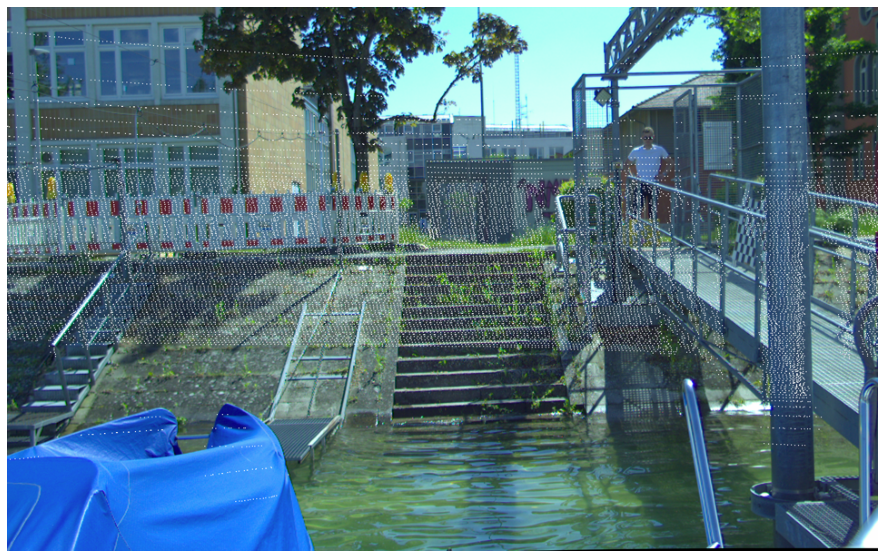

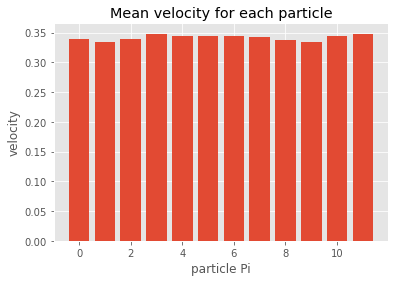

(114, 6)


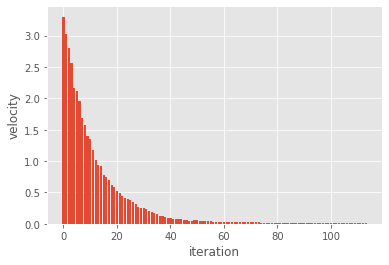

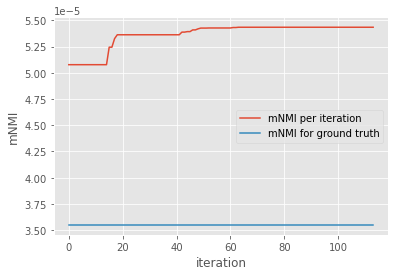

In [4]:
##################
# MULTISENSEDATA #
##################
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData

#basedir = "D:\\Thesis\\multisense"
basedir = "D:\\Thesis\\multisense_stereo"

multisense = MultiSenseData(basedir, preload=False)
#RT = np.load("calib/multisense_seq_27_RT_old_to_new_recentered_GT.npy")
#RT = np.load("calib/multisense_seq_stereo_TR_icp_dist_to_new_improved_GT.npy")
P = multisense.calib.P_rect_20

BATCH_SIZE = 1

point_clouds = []
cam2s = []
for i in range(BATCH_SIZE):
    point_cloud, cam2, image3, _ = multisense[i]
    point_clouds.append(point_cloud)
    cam2s.append(cam2)

# Create Particle Swarm object
# angles: roll, pitch, yaw
#pso = PSO(20, point_cloud, cam2, P, 15, 3, 15, .5, RT_gt=RT, max_z=200)
#pso = PSO(12, point_cloud, cam2, P, 2, 2, 2, .01, RT_gt=RT, max_z=1000)
pso = PSO(12, point_clouds, cam2s, P, 2, 2, 2, .06, RT_gt=RT, max_z=300, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

# Run Particle Swarm Optimization
def doPSO():
    frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, max_converge_count=50)

#%prun doPSO()
doPSO()

Plotting Yaw, Roll ...


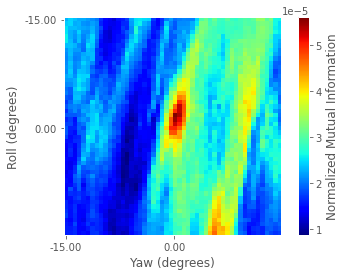

In [321]:
# Plot nmi for different roll and yaw angles
pso.plotYawRoll2D(max_yaw=15, max_roll=15, num_values=50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154


C:\Users\bernh\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


IntProgress(value=0, max=64)

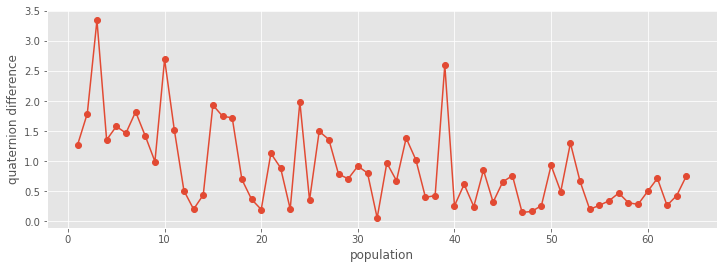

Minimum: 32


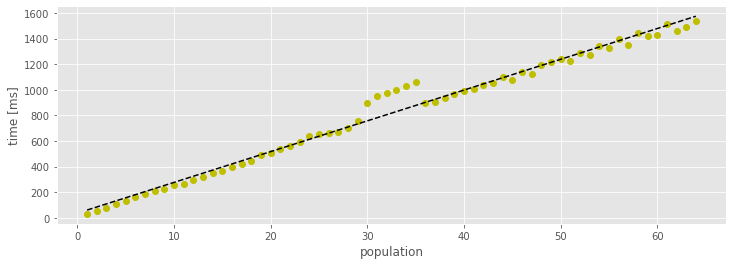

Steigung:  24.046259111429855


In [5]:
########################
# PARTICLES EXPERIMENT #
########################
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, './datasets')
from PSO import *
from PyKitti2Dataset import PyKitti2
from ipywidgets import IntProgress
from IPython.display import display
import time
from scipy import stats

basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training"
seq = "0000"

kitti = PyKitti2(basedir, seq, with_labels="mask")

point_cloud, cam2, image3, oxts, im_labels, velo_labels = kitti[0]
RT = kitti.calib.T_cam2_velo
P = kitti.calib.P_rect_20

MAX_PARTICLES = 64


quatList = []
timeList = []

# fancy progress bar
f = IntProgress(min=0, max=MAX_PARTICLES)
display(f)

for i in range(1, MAX_PARTICLES+1):
    f.value += 1
    f.description = "{:.2f}".format((i-1) / MAX_PARTICLES * 100) + "%"

    pso = PSO(i, point_cloud, cam2, P, 2, 2, 2, .06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)
    pso.c1 = .1 #.1
    pso.c2 = .1 #.1
    pso.w = .8

    # Run Particle Swarm Optimization
    frame, NMI, RT_delta, frob, quat, times = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
    
    quatList.append(quat)
    timeList.append(times)

# Plot
quatList = np.asarray(quatList)
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, MAX_PARTICLES+1, 1), quatList, marker='o')
plt.ylabel("quaternion difference")
plt.xlabel("population")

import tikzplotlib
tikzplotlib.save('population.tex')
plt.show()

print("Minimum: " + str(np.argmin(quatList)+1))

# Plot time
x = np.arange(1, MAX_PARTICLES+1, 1)
y = np.asarray(timeList) * 1e3
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

quatList = np.asarray(quatList)
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.ylabel("time [ms]")
plt.xlabel("population")

import tikzplotlib
tikzplotlib.save('population_time.tex')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("Steigung: ", str(slope))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154


C:\Users\bernh\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 1
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 1
max_translation: 		 0.0 [m]
max_roll: 			 0 [deg]
max_pitch: 			 0 [deg]
max_yaw: 			 0 [deg]
modified NMI calculation: 	 True


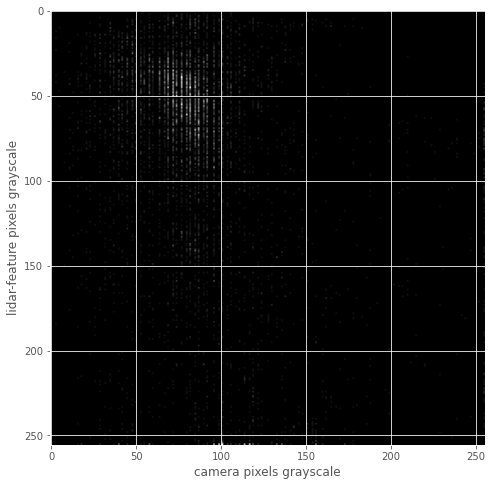

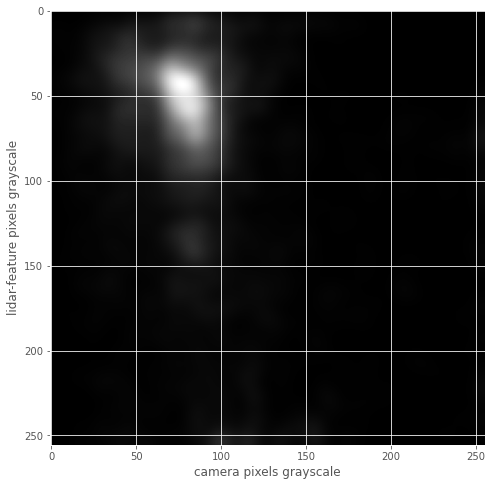

Best NMI for iteration  1  with  1  particles:  0.00015416  conv_count: 0     eta: 0.57s

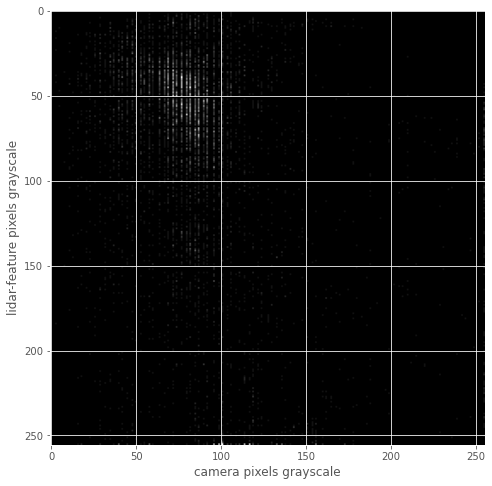

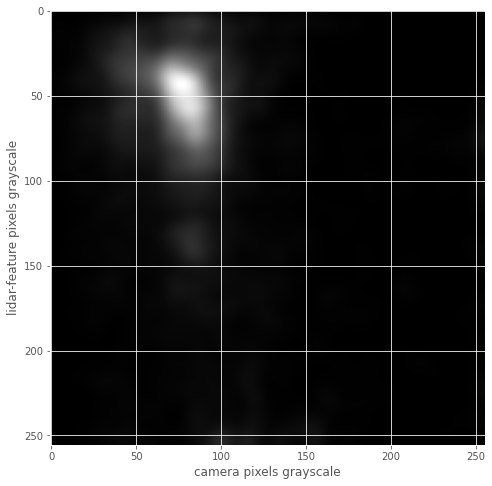

Best NMI for iteration  2  with  1  particles:  0.00015417  conv_count: 0     eta: 0.63s
d: [ 1.00000000e+00 -3.18234264e-08  7.88056004e-07 -4.08024935e-06]
d[1:] [-3.18234264e-08  7.88056004e-07 -4.08024935e-06]
vec: 4.155776670420054e-06
mag: 0.9999999999913647

DONE in  1.2010195000038948 s

NMI:  0.00015416790454176658
Delta x:  0.00020779387109328426
Delta y:  0.00043382936130291483
Delta z:  0.00028575719704715397
Magnitude: 0.00055950280004364

Delta roll:  -2.693502295869621e-06
Delta pitch:  -0.0004675833253203754
Delta yaw:  9.01998127318393e-05
Frobeniusnorm: 1.1788756455095796e-05
Quaternion Differenz: 0.00047621692762936846



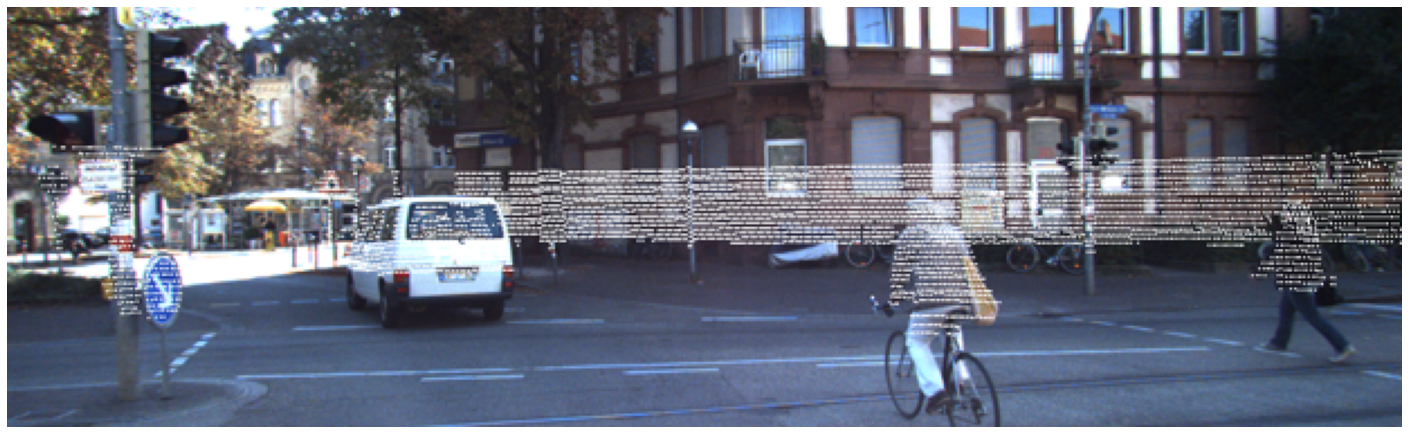

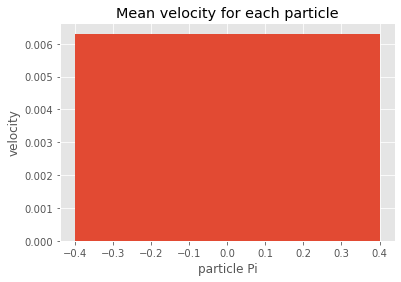

(2, 6)


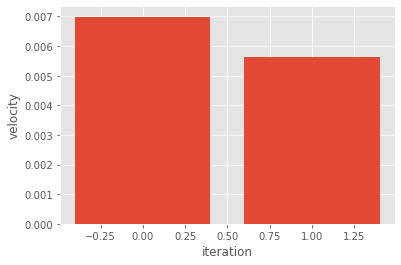

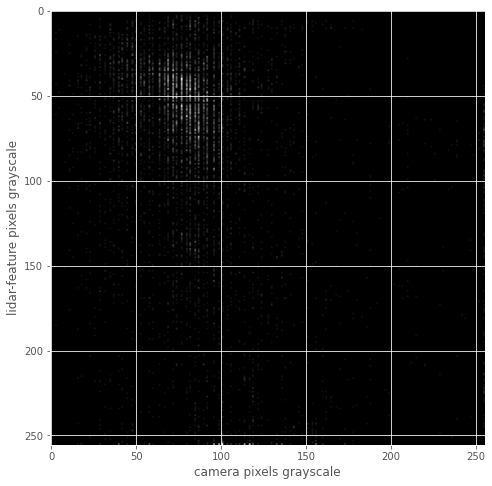

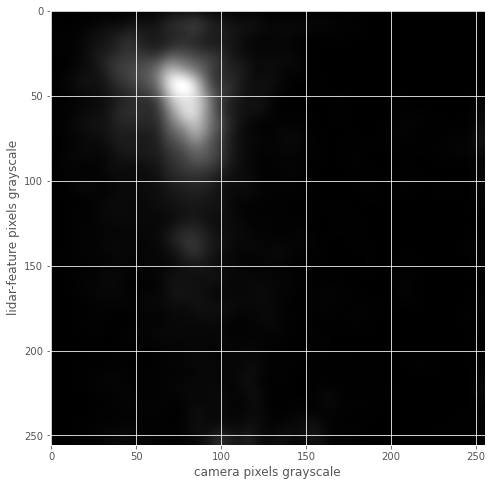

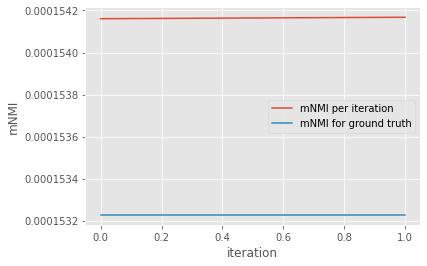

In [63]:
# Render Joint Histogram
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, './datasets')
from PSO import *
from PyKitti2Dataset import PyKitti2

basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training"
seq = "0000"

kitti = PyKitti2(basedir, seq, with_labels="mask")

point_cloud, cam2, image3, oxts, im_labels, velo_labels = kitti[0]
RT = kitti.calib.T_cam2_velo
P = kitti.calib.P_rect_20

# Create Particle Swarm object
# angles: yaw, pitch, roll
#pso = PSO(1, point_cloud, cam2, P, 0, 0, 0, .0, RT_gt=RT, max_z=15, modified=True, method="normals", filter=True)
pso = PSO(1, point_cloud, cam2, P, 0, 0, 0, .0, RT_gt=RT, max_z=30, modified=True, method="reflectance", filter=True)


pso.c1 = .1 #.1
pso.c2 = .1 #.1
pso.w = .8

# Run Particle Swarm Optimization
frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=1, render=True, log_iterations=True, max_converge_count=-1)

MovieWriter imagemagick unavailable; using Pillow instead.


PSO found best solution at f([3.18556579 3.12976318])=-1.8083510960003584
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


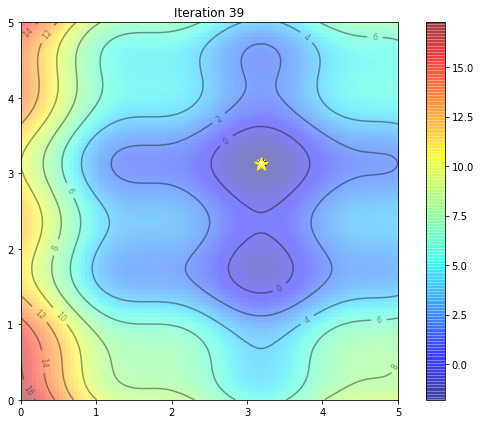

In [23]:
#Source: https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='jet', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=8, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='black', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='black', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=200, color='yellow')
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,40)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

Plotting Gradient ...


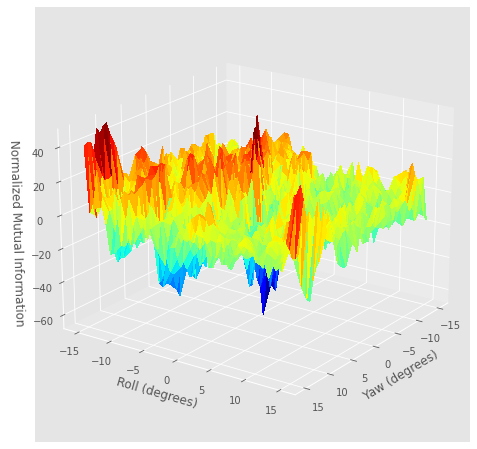

In [7]:
# Plot gradient of NMI function for different roll and yaw angles
pso.plotYawRollGradient(max_yaw=15, max_roll=15, num_values=50)

In [1]:
print("###########################################################")
print("# KITTI: 5x normals on single frame for three distances t #")
print("###########################################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("NORMALS")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=15, modified=True, method="normals", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)

###########################################################
# KITTI: 5x normals on single frame for three distances t #
###########################################################
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
files 154
NORMALS






t =  0.01
--- Standardabweichungen ---
Std NMI: 5.720224905795785e-06
Std dx: 0.0396780280680898
Std dy: 0.12603367197874346
Std dz: 0.07412377795965429
Std roll: 0.039809089248303196
Std pitch: 0.9392516196919405
Std yaw: 0.5063247789690754
Std Frobenius: 0.022069385099592647
Std Quaternion: 0.8942700334329395

--- Mittelwerte ---
Mean NMI: 6.41567600418109e-05
Mean dx: 0.07677862815567889
Mean dy: 0.07198177873711203
Mean dz: 0.1111170666600009
Mean roll: -0.03620664325801783
Mean pitch: -1.2802141541901644
Mean yaw: -1.1141903551457772
Mean Frobenius: 0.04427845052493856
Mean Quaternion: 1.794038928813432

--- Median

In [13]:
print("######################################################################################")
print("# MULTISENSE_SEQ: 5x normals on single frame for three distances t #")
print("######################################################################################")
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2

basedir = "D:\\Thesis\\multisense" # seq

dataset = MultiSenseData(basedir) # multisense


point_cloud, cam2, image3, _ = dataset[0]
RT = np.load("calib/multisense_seq_27_RT_old_to_new_recentered_GT.npy") # seq

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("NORMALS")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k] # multisense
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="normals", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)

######################################################################################
# MULTISENSE_SEQ: 5x euclidean, 5x reflectance on single frame for three distances t #
######################################################################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
NORMALS






t =  0.01
--- Standardabweichungen ---
Std NMI: 9.440896341372332e-07
Std dx: 0.06197184908479297
Std dy: 0.07954260686645001
Std dz: 0.04549391625063888
Std roll: 0.4015624375140885
Std pitch: 2.250156275264695
Std yaw: 0.08419427348142967
Std Frobenius: 0.022105934198712207
Std Quaternion: 0.8955639609324809

--- Mittelwerte ---
Mean NMI: 1.5774400473340357e-05
Mean dx: 0.06524899193064712
Mean dy: 0.10644163157509286
Mean dz: 0.03816346742942557
Mean roll: 0.7686851613637146
Mean pitch: 1.0280071290816206
Mean yaw: -0.16703699858153415
Mean Frobenius: 0.06096475934351121
Mean Quaternion: 2.470182002802583

--- Median ---
Media

In [15]:
print("#########################################################################################")
print("# MULTISENSE_STEREO: 5x normals on single frame for three distances t #")
print("#########################################################################################")
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\multisense_stereo" # stereo

dataset = MultiSenseData(basedir) # multisense


point_cloud, cam2, image3, _ = dataset[0]

RT = np.load("calib/multisense_seq_stereo_TR_icp_dist_to_new_improved_GT.npy") # stereo

P = dataset.calib.P_rect_20

# Create Particle Swarm object
pso = PSO(12, point_cloud, cam2, P, 5, 5, 5, .06, RT_gt=RT, max_z=1000, modified=True, method="euclidean", filter=True)

runs = 5
BATCH_SIZE = 1


print("REFLECTANCE")
frames = []
NMIs = []
RT_deltas = []
frobs = []
quats = []
t = [0.01, 0.02, 0.06]
for transl in t:
    for i in range(runs):
        point_clouds = []
        cam2s = []
        for k in range(BATCH_SIZE):
            point_cloud, cam2, image3, _ = dataset[k] # multisense
            
            point_clouds.append(point_cloud)
            cam2s.append(cam2)
        
        pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, transl, RT_gt=RT, max_z=200, modified=True, method="normals", filter=True)
        
        # Configure Hyperparameters
        pso.c1 = .25
        pso.c2 = .25
        pso.w = .8
        
        frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=False, log_iterations=False, log_results=False, max_converge_count=50)
        frames.append(frame)
        NMIs.append(NMI)
        RT_deltas.append(RT_delta)
        frobs.append(frob)
        quats.append(quat)
    
    print()
    print("t = ", transl)
    pso.std(NMIs, RT_deltas, frobs, quats)
    print()
    pso.mean(NMIs, RT_deltas, frobs, quats)
    print()
    pso.median(NMIs, RT_deltas, frobs, quats)

#########################################################################################
# MULTISENSE_STEREO: 5x normals on single frame for three distances t #
#########################################################################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
REFLECTANCE






t =  0.01
--- Standardabweichungen ---
Std NMI: 2.015280527194936e-06
Std dx: 0.04787432407289044
Std dy: 0.03643272201618715
Std dz: 0.10519113382302768
Std roll: 0.6891689021035627
Std pitch: 1.075556107615739
Std yaw: 0.3376136564524477
Std Frobenius: 0.012072631984688609
Std Quaternion: 0.48828070554719316

--- Mittelwerte ---
Mean NMI: 2.9758036606854438e-05
Mean dx: 0.04017400126421293
Mean dy: 0.05899984893386336
Mean dz: 0.1109886625337932
Mean roll: -0.07571186179793302
Mean pitch: 0.366215563666631
Mean yaw: 0.04946912672177746
Mean Frobenius: 0.03164862810982835
Mean Quaternion: 1.2832708426308161

--- Median ---
Median NMI

In [14]:
import numpy as np
import re

s = """Std dx: 0.06547805755407006
Std dy: 0.0768285712483743
Std dz: 0.02853160873981157"""

parsed = []
for line in s.splitlines():
    x = re.findall("\d+\.\d+", line)[0]
    parsed.append(float(x))

result = np.sqrt(parsed[0]*parsed[0] + parsed[1]*parsed[1] + parsed[2]*parsed[2])
print(result)
    

0.10490022916277318


################################
# KITTI: Batch size experiment #
################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 1.87 [deg]
max_pitch: 			 1.87 [deg]
max_yaw: 			 1.87 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  83  with  12  particles:  0.00059547  conv_count: 50     eta: 2.70s

DONE in  229.89507250000315 s

NMI:  0.0005954662296732765
Delta x:  0.0015305353372870104
Delta y:  0.022823721083046103
Delta z:  0.027633091210267857
Magnitude: 0.035872726580653866

Delta roll:  -0.019632218794029654
Delta pitch:  -0.3371923480175607
Delta yaw:  -0.06813391672358193
Frobeniusnorm: 0.00850355499742749
Quaternion Differenz: 0.3445144237944391



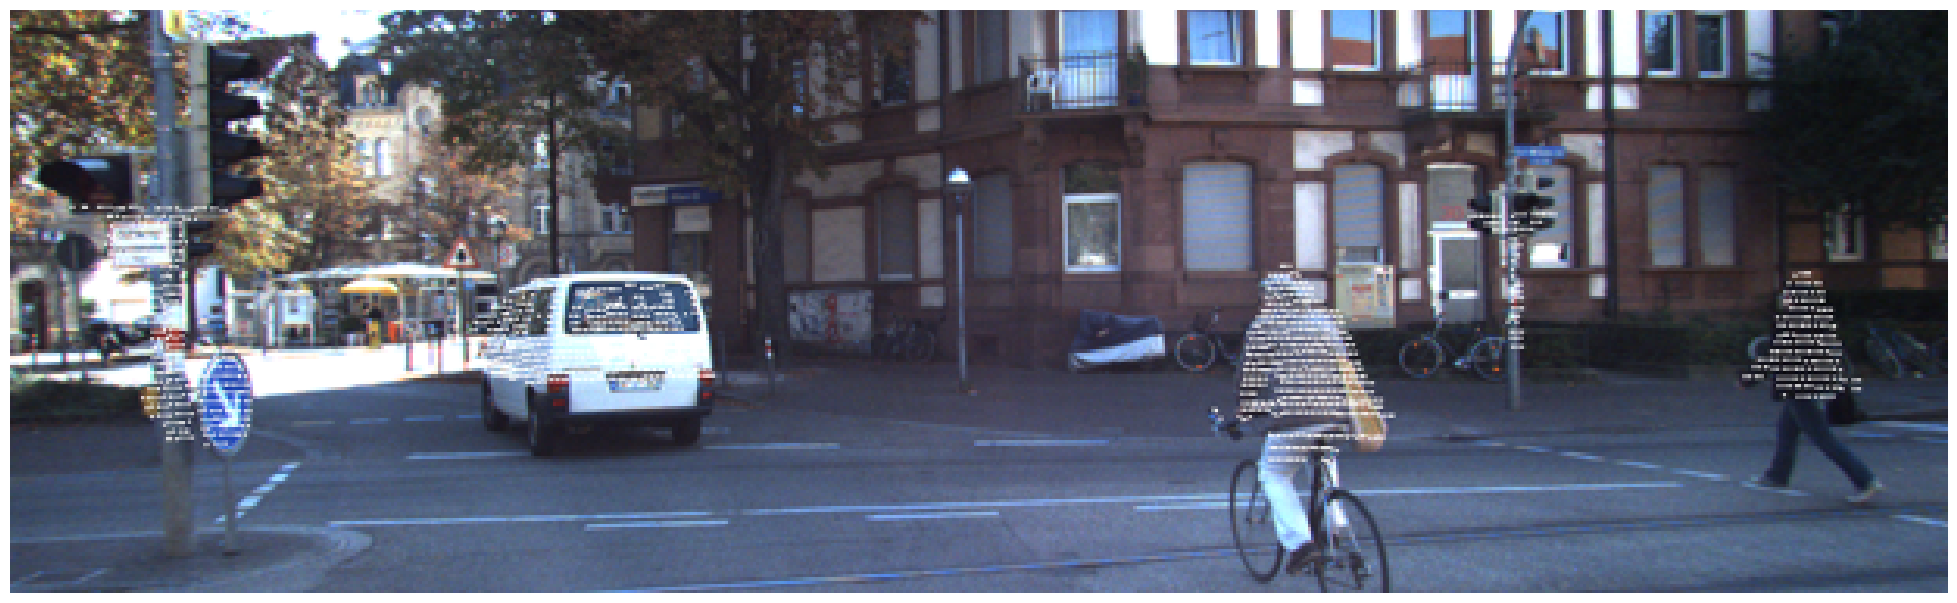

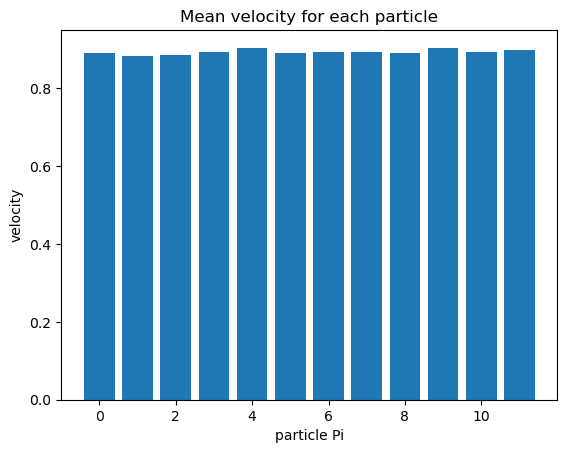

(83, 6)


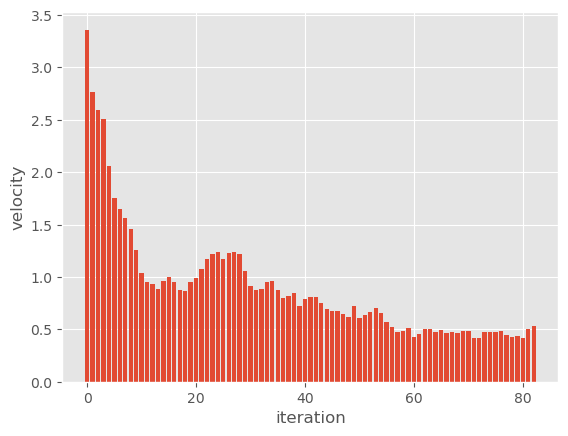

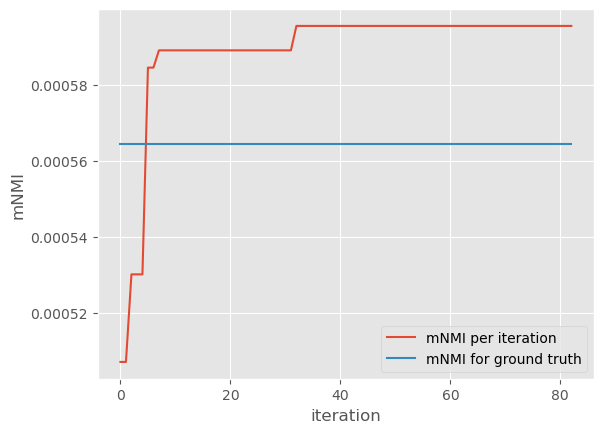

In [85]:
print("###################################")
print("# KITTI: Batch size 10 experiment #")
print("###################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 10

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, log_results=True, max_converge_count=50)

################################
# KITTI: Batch size experiment #
################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 1.87 [deg]
max_pitch: 			 1.87 [deg]
max_yaw: 			 1.87 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  113  with  12  particles:  0.00006834  conv_count: 50     eta: 0.36s

DONE in  37.711924300005194 s

NMI:  6.833516867828456e-05
Delta x:  0.03684987180124334
Delta y:  0.003658204245680391
Delta z:  0.06416049631520626
Magnitude: 0.07408012417298435

Delta roll:  0.006879736779822565
Delta pitch:  0.4932988448178481
Delta yaw:  -0.4790177615854674
Frobeniusnorm: 0.016973384281716485
Quaternion Differenz: 0.687669201839218



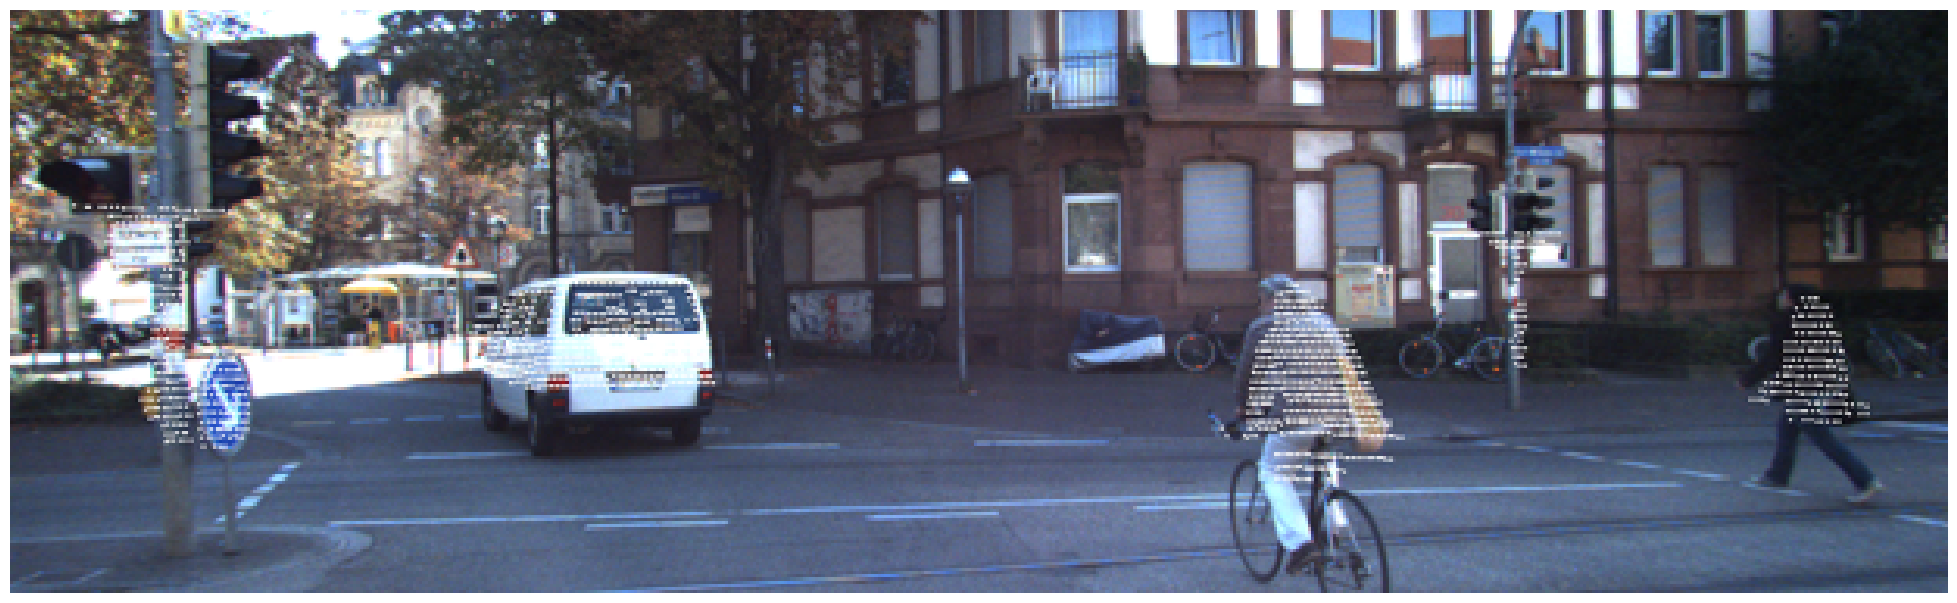

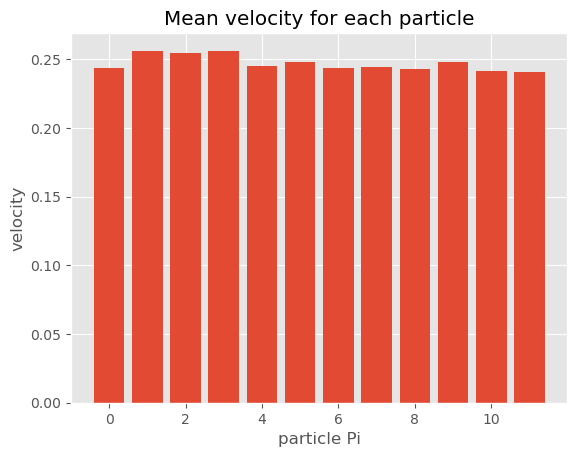

(113, 6)


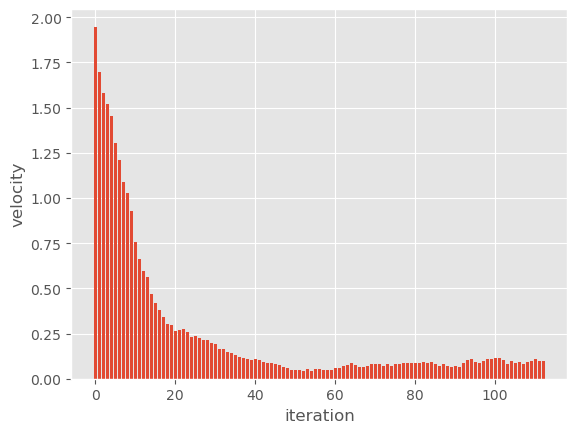

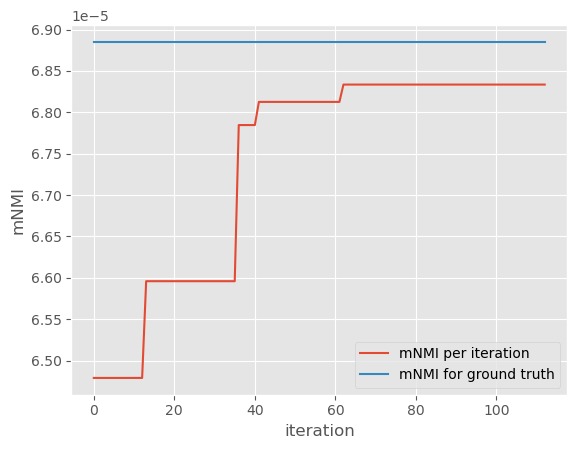

In [87]:
print("##################################")
print("# KITTI: Batch size 1 experiment #")
print("##################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 1

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, log_results=True, max_converge_count=50)

##################################
# KITTI: Batch size 5 experiment #
##################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 1.87 [deg]
max_pitch: 			 1.87 [deg]
max_yaw: 			 1.87 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  125  with  12  particles:  0.00027841  conv_count: 50     eta: 1.34s

DONE in  179.14162049999868 s

NMI:  0.00027841187503270683
Delta x:  0.040547258204284425
Delta y:  0.023605419182225168
Delta z:  0.10508676570916009
Magnitude: 0.1150848569094361

Delta roll:  0.011569766167056628
Delta pitch:  0.49491399533909874
Delta yaw:  -0.27342538211186707
Frobeniusnorm: 0.013959796563528581
Quaternion Differenz: 0.5655742267478144



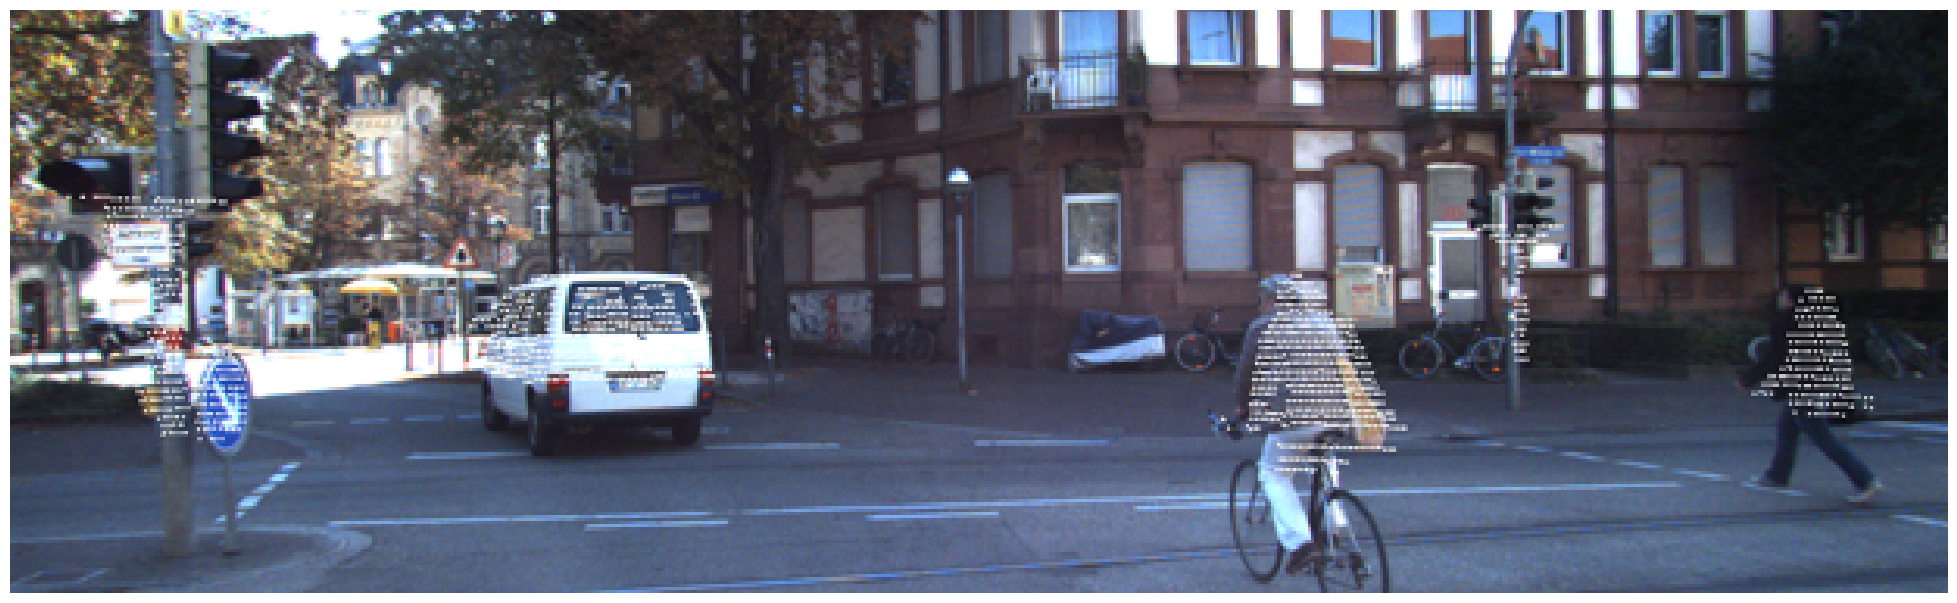

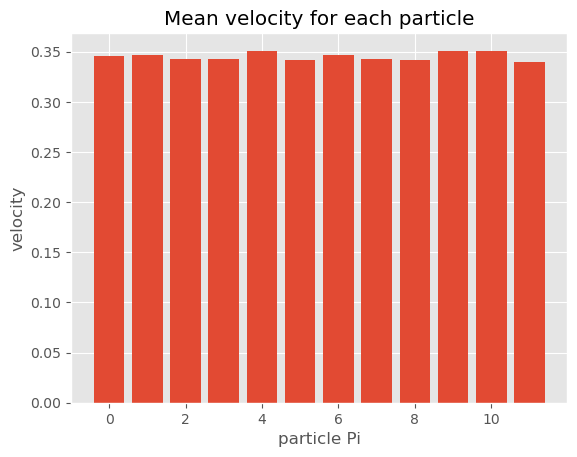

(125, 6)


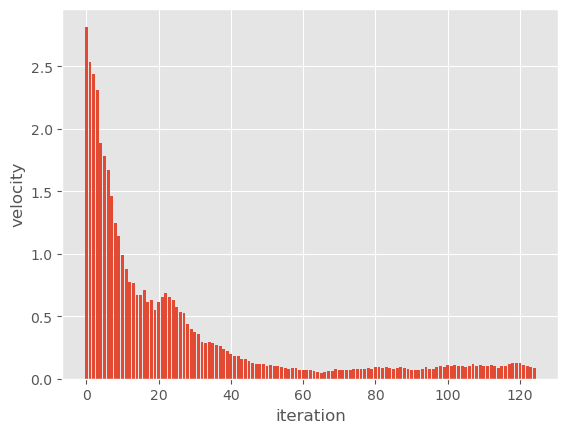

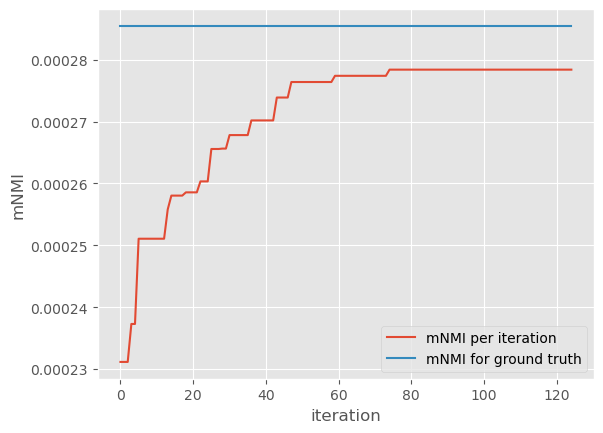

In [88]:
print("##################################")
print("# KITTI: Batch size 5 experiment #")
print("##################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 5

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, log_results=True, max_converge_count=50)

##################################
# KITTI: Batch size 15 experiment #
##################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 1.87 [deg]
max_pitch: 			 1.87 [deg]
max_yaw: 			 1.87 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  126  with  12  particles:  0.00059886  conv_count: 50     eta: 4.03s

DONE in  524.0639083999995 s

NMI:  0.0005988579101169204
Delta x:  0.011498529199562567
Delta y:  0.08372279922885932
Delta z:  0.021628312615510403
Magnitude: 0.0872324893091062

Delta roll:  0.011979394533526033
Delta pitch:  1.1237121048963243
Delta yaw:  0.30412005656508256
Frobeniusnorm: 0.028734966405879126
Quaternion Differenz: 1.1641962551845149



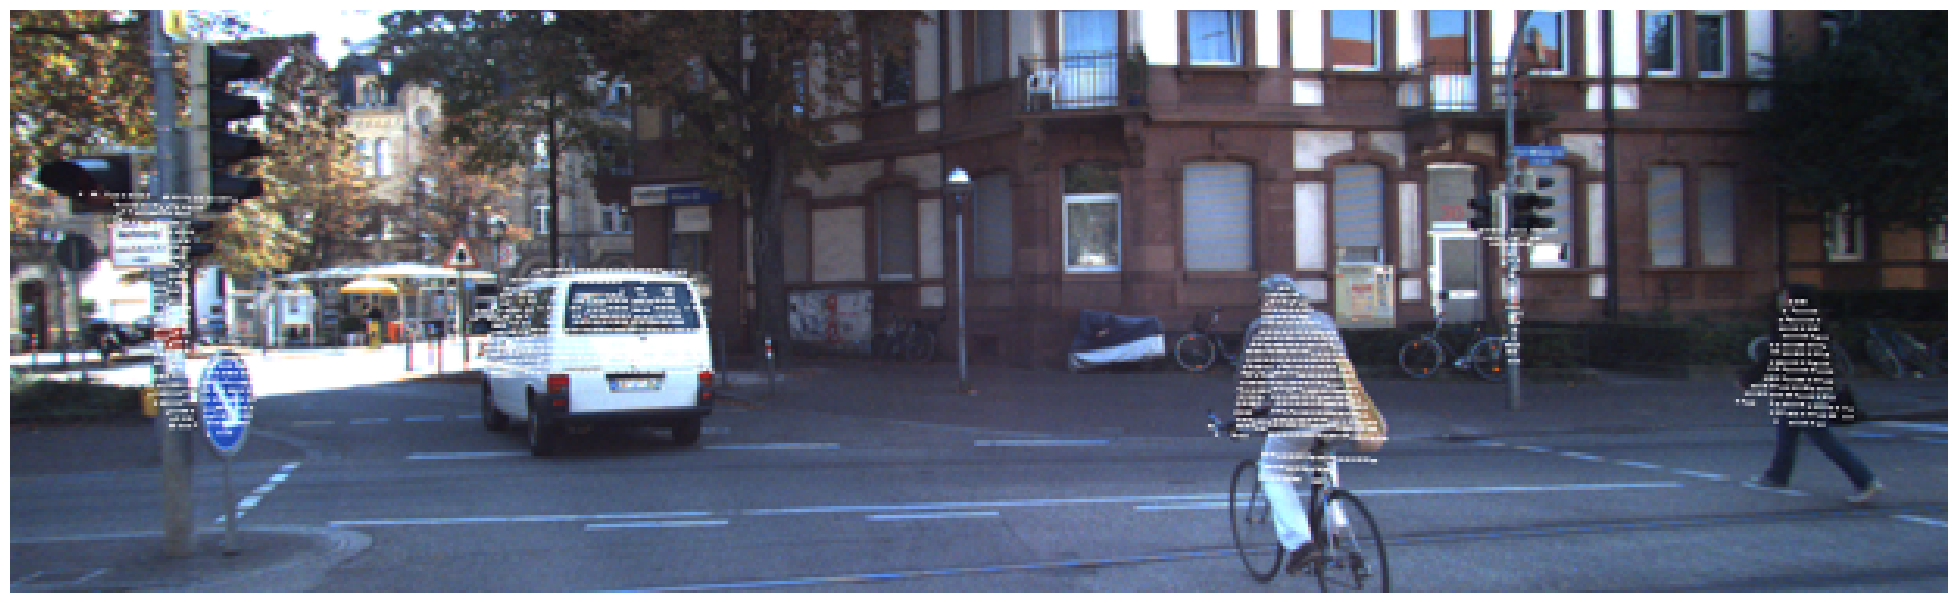

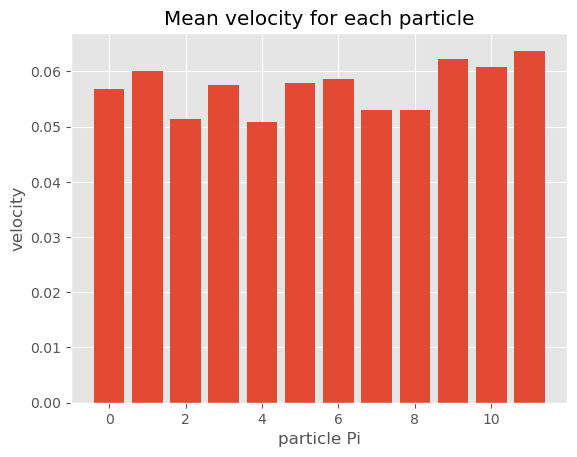

(126, 6)


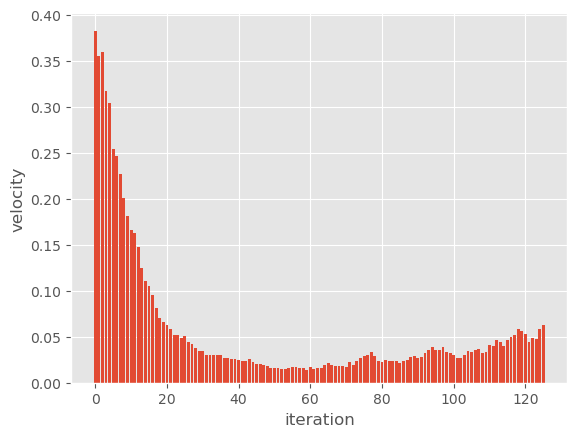

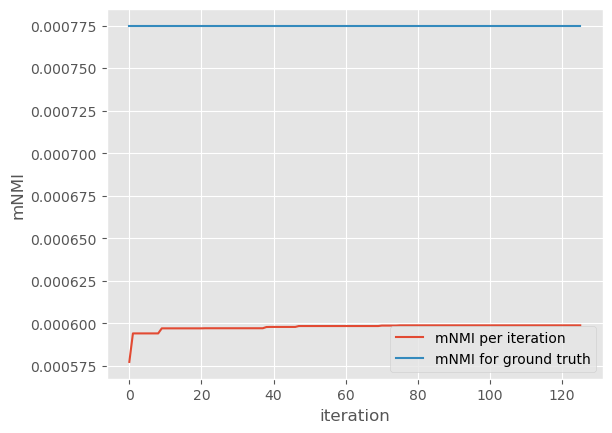

In [89]:
print("##################################")
print("# KITTI: Batch size 15 experiment #")
print("##################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 15

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(12, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, log_results=True, max_converge_count=50)

##################################
# KITTI: Batch size 15 Histogramm #
##################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154
RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 1
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 1
max_translation: 		 0.06 [m]
max_roll: 			 1.87 [deg]
max_pitch: 			 1.87 [deg]
max_yaw: 			 1.87 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  2  with  1  particles:  0.00062152  conv_count: 0     eta: 0.37s
DONE in  0.7715525999956299 s

NMI:  0.0006215176244378824
Delta x:  0.061004732522397326
Delta y:  0.012020060001221342
Delta z:  0.005920174781417709
Magnitude: 0.06245884806818596

Delta roll:  -0.029227998547014522
Delta pitch:  -0.023185813036157743
Delta yaw:  -0.3406728474029421
Frobeniusnorm: 0.00845123969153013
Quaternion Differenz: 0.3423966239293342



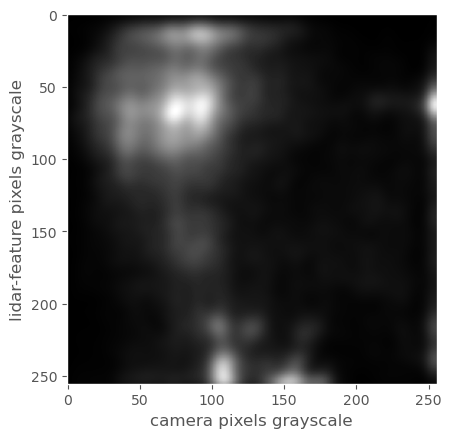

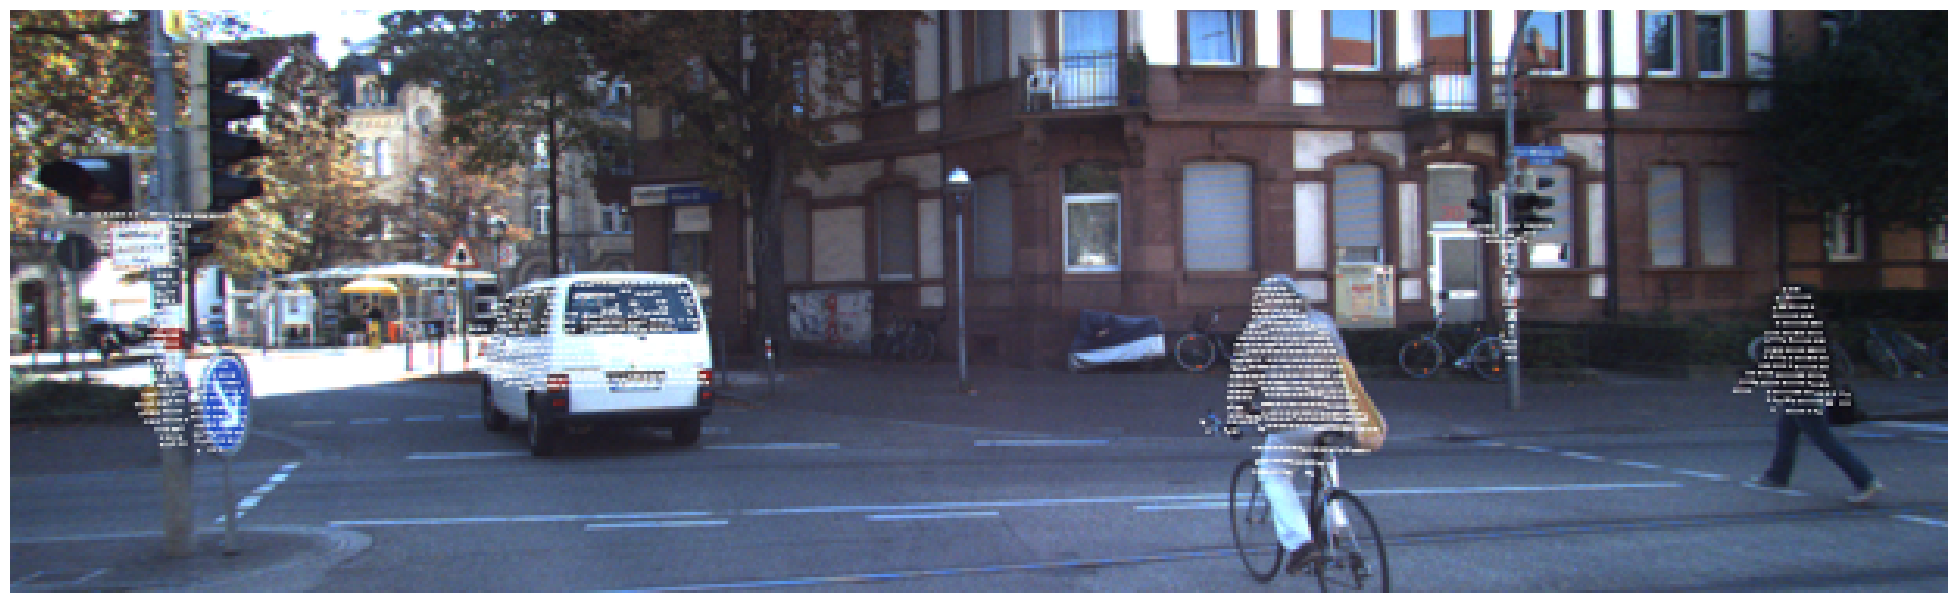

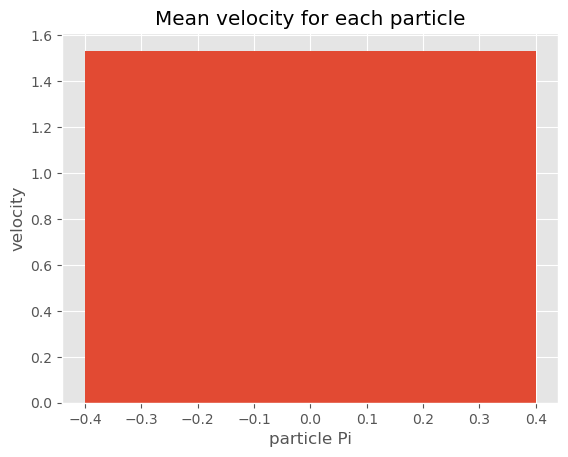

(2, 6)


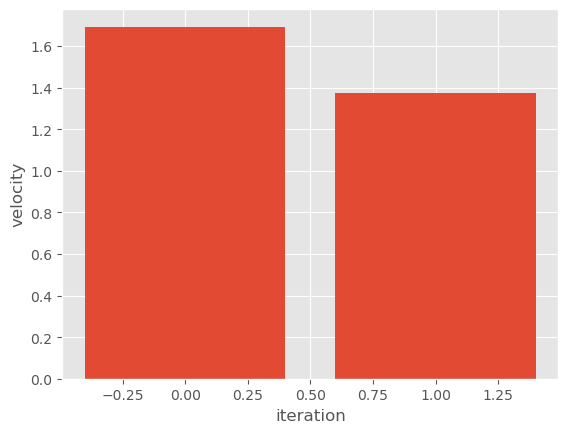

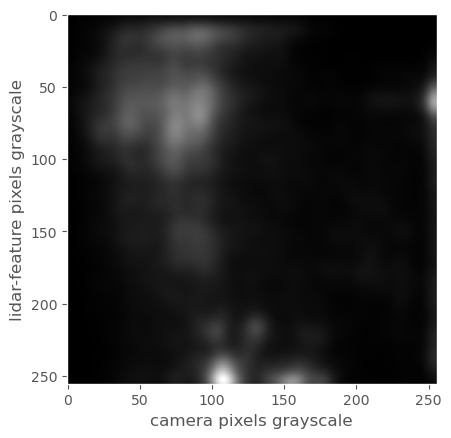

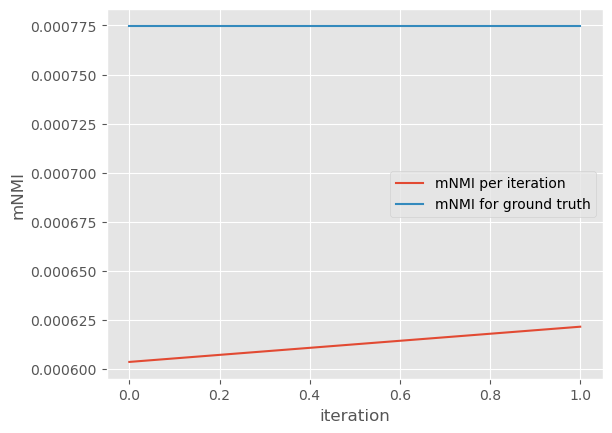

In [96]:
print("##################################")
print("# KITTI: Batch size 15 Histogramm #")
print("##################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 15

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(1, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="reflectance", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=1, render=True, log_iterations=True, log_results=True, max_converge_count=50)

In [10]:
print("##################################")
print("# Normals calculation time  #")
print("##################################")

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from PSO import *
import sys
sys.path.insert(0, './datasets')
from MultiSenseDataset import MultiSenseData
from PyKitti2Dataset import PyKitti2


basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training" # kitti

dataset = PyKitti2(basedir, "0000", with_labels="mask") # kitti


point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[0]
RT = dataset.calib.T_cam2_velo # kitti

P = dataset.calib.P_rect_20

BATCH_SIZE = 10

point_clouds = []
cam2s = []
for k in range(BATCH_SIZE):
    
    point_cloud, cam2, image3, oxts, im_labels, velo_labels = dataset[k] # kitti

    point_clouds.append(point_cloud)
    cam2s.append(cam2)
        
pso = PSO(1, point_clouds, cam2s, P, 1.87, 1.87, 1.87, 0.06, RT_gt=RT, max_z=15, modified=True, method="normals", filter=True)

# Configure Hyperparameters
pso.c1 = .25
pso.c2 = .25
pso.w = .8

frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=100, render=False, log_iterations=False, log_results=True, max_converge_count=-1)

##################################
# Normals calculation time  #
##################################
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 154

DONE in  24.169961200000216 s

NMI:  0.00018778519962644568
Delta x:  0.15100293425767036
Delta y:  0.06636956567388858
Delta z:  0.19228544710681617
Magnitude: 0.2533387032635067

Delta roll:  -0.04186876881985313
Delta pitch:  -0.9796953308684017
Delta yaw:  -1.1235712689829853
Frobeniusnorm: 0.036793054909091044
Quaternion Differenz: 1.4906841716145252



In [49]:
######################
# Mutual Information #
######################
import numpy as np
import cv2
from PIL import Image
def mutual_information_2d(x, y, normalized=True, sigma=5):
        EPS = np.finfo(float).eps  # machine epsilon
    
        jh = np.histogram2d(x, y, bins=256)[0]
        
        # compute marginal histograms
        jh = jh + EPS
        sh = np.sum(jh)
        jh = jh / sh
        s1 = np.sum(jh, axis=0).reshape((-1, jh.shape[0]))
        s2 = np.sum(jh, axis=1).reshape((jh.shape[1], -1))
        
        # Normalised Mutual Information of:
        # Studholme,  jhill & jhawkes (1998).
        # "A normalized entropy measure of 3-D medical image alignment".
        # in Proc. Medical Imaging 1998, vol. 3338, San Diego, CA, pp. 132-143.
        if normalized:
            mi = ((np.sum(s1 * np.log(s1)) + np.sum(s2 * np.log(s2)))
                    / np.sum(jh * np.log(jh))) - 1
        else:
            mi = ( np.sum(jh * np.log(jh)) - np.sum(s1 * np.log(s1))
                   - np.sum(s2 * np.log(s2)))
    
        return mi
    
lena_orig = np.asarray(Image.open("data/len_std.jpg").convert('L'))
lena_noise_10 = np.asarray(Image.open("data/len_10.jpg").convert('L'))
lena_noise_25 = np.asarray(Image.open("data/len_25.jpg").convert('L'))

mi_no_noise = mutual_information_2d(lena_orig.flatten(), lena_orig.flatten())
mi_10_noise = mutual_information_2d(lena_orig.flatten(), lena_noise_10.flatten())
mi_25_noise = mutual_information_2d(lena_orig.flatten(), lena_noise_25.flatten())

print("mi_no_noise", mi_no_noise)
print("mi_10_noise", mi_10_noise)
print("mi_25_noise", mi_25_noise)

result1 = Image.fromarray(lena_orig)
result1.save('lena_gray_orig.jpg')

result2 = Image.fromarray(lena_noise_10)
result2.save('lena_gray_10.jpg')

result2 = Image.fromarray(lena_noise_25)
result2.save('lena_gray_25.jpg')

mi_no_noise 0.9999999999999967
mi_10_noise 0.1839173474149436
mi_25_noise 0.09973450892034008


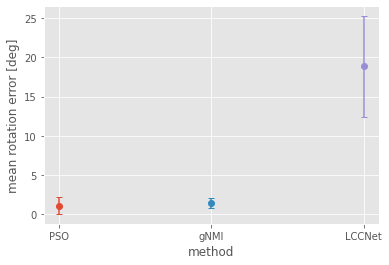

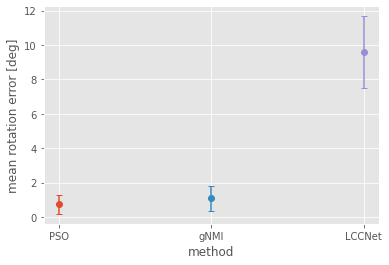

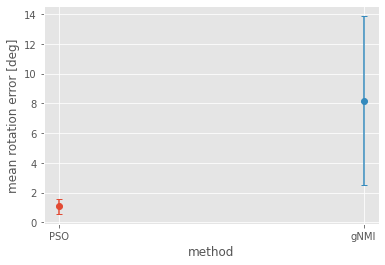

In [68]:
#########################################################
# Plot comparison of different methods (rotation error) #
#########################################################
# distortion = 2 cm (1 cm for LCCNet)
# jeweils Reflektanz als Feature

import matplotlib.pyplot as plt
import tikzplotlib

# multisense_seq
pso_seq_angle_std = 1.07
pso_seq_angle_mean = 1.078

gNMI_seq_angle_std = 0.608
gNMI_seq_angle_mean = 1.4

lccnet_seq_angle_std = 6.411
lccnet_seq_angle_mean = 18.847


# multisense_stereo
pso_stereo_angle_std = 0.555
pso_stereo_angle_mean = 0.737

gNMI_stereo_angle_std = 0.746
gNMI_stereo_angle_mean = 1.087

lccnet_stereo_angle_std = 2.097
lccnet_stereo_angle_mean = 9.578

# plot seq
plt.figure()
plt.xlabel("method")
plt.ylabel("mean rotation error [deg]")

plt.errorbar(["PSO"], pso_seq_angle_mean, pso_seq_angle_std, linestyle="None", marker='o', capsize=3)
plt.errorbar(["gNMI"], gNMI_seq_angle_mean, gNMI_seq_angle_std, linestyle="None", marker='o', capsize=3)
plt.errorbar(["LCCNet"], lccnet_seq_angle_mean, lccnet_seq_angle_std, linestyle="None", marker='o', capsize=3)

tikzplotlib.save("vgl_multiseq.tex")
plt.show()

# plot stereo
plt.figure()
plt.xlabel("method")
plt.ylabel("mean rotation error [deg]")

plt.errorbar(["PSO"], pso_stereo_angle_mean, pso_stereo_angle_std, linestyle="None", marker='o', capsize=3)
plt.errorbar(["gNMI"], gNMI_stereo_angle_mean, gNMI_stereo_angle_std, linestyle="None", marker='o', capsize=3)
plt.errorbar(["LCCNet"], lccnet_stereo_angle_mean, lccnet_stereo_angle_std, linestyle="None", marker='o', capsize=3)
tikzplotlib.save("vgl_multistereo.tex")
plt.show()


#######################################
# Plot comparison PSO gNMI KITTI only #
#######################################
# kitti
pso_kitti_angle_std = 0.514
pso_kitti_angle_mean = 1.0734

gNMI_kitti_angle_std = 5.691
gNMI_kitti_angle_mean = 8.17

# plot kitti
plt.figure()
plt.xlabel("method")
plt.ylabel("mean rotation error [deg]")

plt.errorbar(["PSO"], pso_kitti_angle_mean, pso_kitti_angle_std, linestyle="None", marker='o', capsize=3)
plt.errorbar(["gNMI"], gNMI_kitti_angle_mean, gNMI_kitti_angle_std, linestyle="None", marker='o', capsize=3)
tikzplotlib.save("vgl_kitti.tex")
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
files 294


C:\Users\bernh\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


RUNNING PSO WITH THE FOLLOWING CONFIGURATION:
Particles amount: 		 12
Method: 			 reflectance
Gauss filter: 			 True
Max. Iterations: 		 500
max_translation: 		 0.06 [m]
max_roll: 			 2 [deg]
max_pitch: 			 2 [deg]
max_yaw: 			 2 [deg]
modified NMI calculation: 	 True
Best NMI for iteration  89  with  12  particles:  0.00004175  conv_count: 50     eta: 0.29s

DONE in  26.086019000000306 s

NMI:  4.174861991472358e-05
Delta x:  0.052878074429808436
Delta y:  0.009532184490308071
Delta z:  0.023888811437645402
Magnitude: 0.05880160379160596

Delta roll:  -0.021016388882742376
Delta pitch:  -1.271384570486576
Delta yaw:  -0.6455159066235865
Frobeniusnorm: 0.03519203491641559
Quaternion Differenz: 1.425814312551105



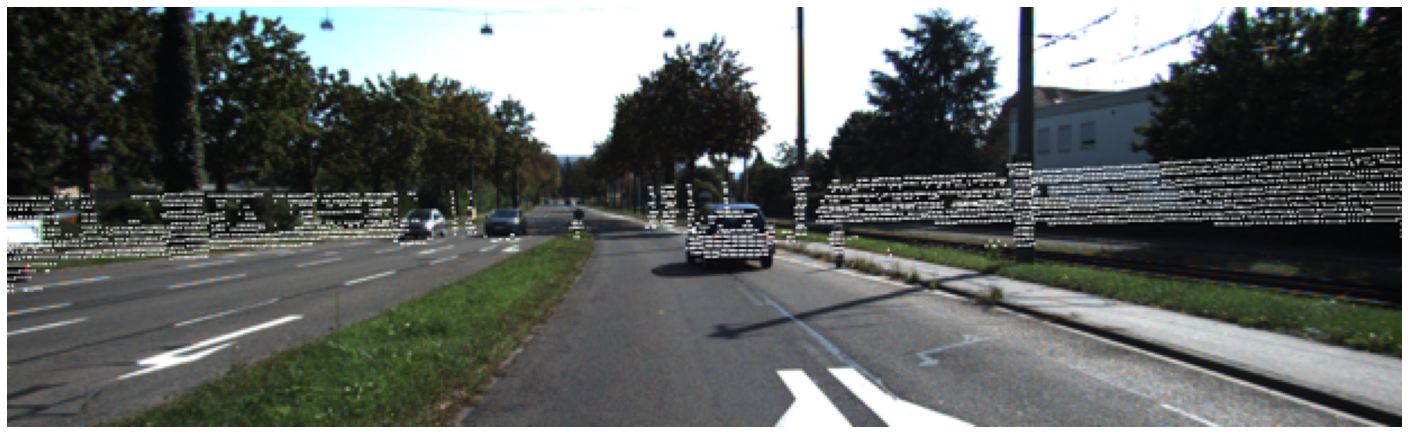

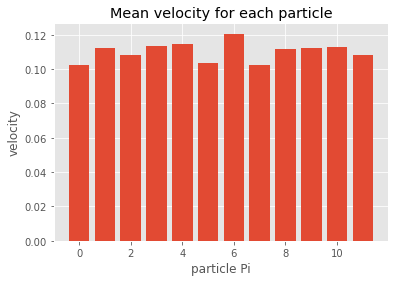

(89, 6)


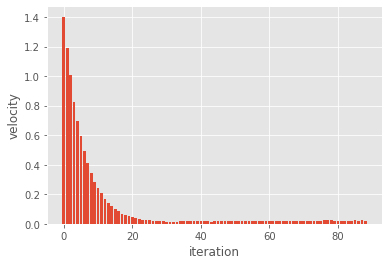

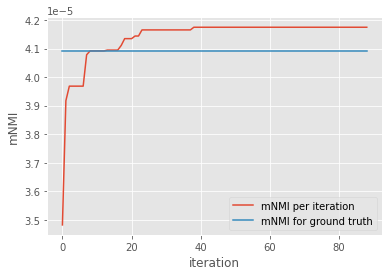

In [15]:
# Standart KITTI experiment
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, './datasets')
from PSO import *
from PyKitti2Dataset import PyKitti2

basedir = "D:\\Thesis\\kitti\\data\\kitti\\tracking\\training"
seq = "0010"

kitti = PyKitti2(basedir, seq, with_labels="mask")

point_cloud, cam2, image3, oxts, im_labels, velo_labels = kitti[0]
RT = kitti.calib.T_cam2_velo
P = kitti.calib.P_rect_20

# Create Particle Swarm object
# angles: yaw, pitch, roll
pso = PSO(12, point_cloud, cam2, P, 2, 2, 2, .06, RT_gt=RT, max_z=300, modified=True, method="reflectance", filter=True)


pso.c1 = .1 #.1
pso.c2 = .1 #.1
pso.w = .8

# Run Particle Swarm Optimization
frame, NMI, RT_delta, frob, quat = pso.run(max_iterations=500, render=True, log_iterations=True, max_converge_count=50)